**Evrişimli sinir ağları** - **Convolutional Neural Networks**

Evrişimsel sinir ağları, derin öğrenmenin bir alt dalıdır ve genellikle görsel bilginin analiz edilmesinde kullanılır. Yaygın kullanım alanları resim ve video tanıma, öneri sistemleri resim sınıflandırma, tıbbi görüntü analizi ve doğal dil işleme olarak sıralanabilir.

In [3]:
from sklearn.datasets import load_boston # boston datasetini aldık sklearn içerisinden
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor  # regression problemi için bunu import ettik
import pandas as pd
from sklearn.model_selection import train_test_split # train ve test için import ettik
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neural_network import MLPClassifier # derin öğrenme ile sınıflandırma 
from sklearn.metrics import accuracy_score # doğruluk score'u
from sklearn.datasets import load_breast_cancer # meme kanseri verisini aldık
import tensorflow as tf 
from tensorflow.keras.models import Sequential





In [4]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
# konvolüsyon ve maxpool'u ekledik 
# düzleştirmek için Flatten'ı ekledik
# dropout'u ekledik, dropout layer 

In [5]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train/255.0
X_test = X_test/255.0

X_train = X_train[...,np.newaxis] # yeni bir tane boyut ekleyecek 
X_test = X_test[...,np.newaxis]
# renkli bir resim için üç kanalımız olması gerekiyor R,G,B kanalları aslında o yüzden 1 ekledik. gray olduğu için 1 yazdık ama normal resimde 3 yapacaktık
model = Sequential([Conv2D(64, kernel_size = (3,3), input_shape=(28,28,1),activation="relu"),    # ilk başta konvolüsyon değerini ekleyeceğiz, 64 filtre eklemiş olduk, kernel_size ise kaça kaçlık bir filtre uygulayacağımızı söylüyoruz, 
                    MaxPool2D((2,2)),                                        # maxpool'da sadece kernel_size'ı söylüyoruz 2*2'lik olsun 
                    Dropout(0.2),         #dropout her bir iterasyon'da weight'leri update ederken, arada 100 bağlantı varsa %20'sini siliyor ve öyle devam ediyor,parametre sayısını azaltıyor daha complex olmuyor ve overfitting olmasını önlüyoruz
                    Conv2D(32, kernel_size = (3,3),activation="relu"),      # konvolüsyonda aktivasyon olacak ama maxpool'da olmayacak
                    MaxPool2D((2,2)),                                     #hala burada 2 boyutlu bir matrisimiz var o yüzden bunu tek boyutlu matrise çevireceğiz
                    Dropout(0.2),
                    Flatten(),                                            # burada tek boyuta çevirmek için kullandık düzleştirmek için 
                    Dense(64,activation="relu"),
                    Dense(32),
                    Dense(10, activation = "softmax")])           # 10 tane output'umuz olduğu için 0 ile 9 rakamı yani, 10 koyduk

model.summary()                    

11493376/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________

yukarıdaki kodun summary'si

Bir tane konvolüsyondan sonra normalde 28*28'lik olan shape'imiz 64 tane 26*26'lık şeyimiz oldu, max_pooling yapınca 13,13,64'e düştü 
sonra 11,11'lik 32 tane yine konvolüsyon değerlerimiz ortaya çıktı. 
sonra yine max_pooling yaptık yarıya düşürdük .
sonra flatten yaparak tek boyuta indirgedik
sonra da dense uyguladık 

In [6]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"]) 

history = model.fit(X_train,y_train,epochs=10, verbose=1, batch_size=32, 
                    validation_split=0.1)  # sadece callbacks'i sildik

#72.000 tane parametre olduğu için çok uzun sürecek
# Cnn'de yaparken parametre sayısı çok fazla, ve o yüzden çok fazla sürüyor, 1 iterasyonu 58 saniyede yaptı cpu'da olduğu için
# biz runtime üzerinden çalışma zamanı türünü değiştir üzerinden gpu'yu seçtik 
# Tensor İşleme Birimi (TPU), Google tarafından derin öğrenme görevlerini hızlandırmak için özel olarak geliştirilmiş bir yongadır.
# gpu ile 13 sn'de aynı işlemi yapmış olduk bunu tpu ile de yapabilirdik tensor processing unit ile 
# bu daha büyük datalarda daha fazla fark edeceğini söyleyebiliriz 

# accuracy değerlerine de bakarsak 0.9971 ulaşmış durumda 
# val_accuracy: 0.9893 olmuş gayet başarılı diyebiliriz model

# complex neural networklerde ya da cnn'ler ile uğraştığımız zaman parametre sayımız çok fazla olacak ve parametre sayımızın çok fazla olması overfit olması demek
# validasyon datası ile orada iyileşme sağlamıyorsa orada dur diyebiliriz öğrenmeyi durdurabiliriz 

# dropout dediğmiz farklı layer  var

Epoch 1/10
1688/1688 [==============================] - 12s 3ms/step - loss: 0.4059 - accuracy: 0.8699 - val_loss: 0.0761 - val_accuracy: 0.9788
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0731 - accuracy: 0.9777 - val_loss: 0.0452 - val_accuracy: 0.9880
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0520 - accuracy: 0.9842 - val_loss: 0.0401 - val_accuracy: 0.9880
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0413 - accuracy: 0.9864 - val_loss: 0.0354 - val_accuracy: 0.9895
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0360 - accuracy: 0.9883 - val_loss: 0.0387 - val_accuracy: 0.9900
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0298 - accuracy: 0.9895 - val_loss: 0.0338 - val_accuracy: 0.9902
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0285 - accuracy: 0.9905 - val_loss: 0.0428 - val_accuracy

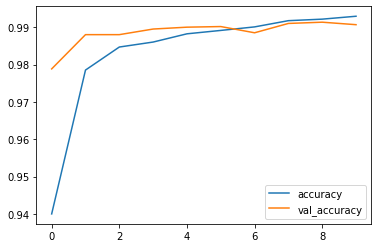

In [7]:
df = pd.DataFrame(history.history) #çizdirmek için 
df[["accuracy","val_accuracy"]].plot() 

# yani bir zaman sonra validasyon datası doyuma ulaşıyor diyebiliriz özellikle sonlara doğru çünkü azalma yaşanıor 